# 1: Data
Here we load the data. It comes from a lego data set from kaggle. https://www.kaggle.com/datasets/rtatman/lego-database

This is a topic I've been interested in since I was a child and now that I have a son we're both enjoying it. 
I felt that lego sets have changed since I was a child. I was interested to see how they had changed. Were the pieces smaller? Were there more sets to choose from? What colours were used now compared to the past. Were there more colours used? And how big were sets then compared to now? Are there more themed sets now? 
Once I started to look I found the Lego data set on Kaggle. It looked like a nice complete data set. It was well broken down and laid out nice. Kaggle is excellent because you can see the reviews and comments people made on the dataset. This data set is actually originally from rebrickable.com. There is a newer dataset there but I thought it better to go with one that was tried and tested. 

Now, lets get to work. First we'll need to import all the data using Pandas. I chose pandas for use with dataframes, seaborn to allow easier visualisations and numpy because it allows faster and more compact arrays than python lists. 



In [2]:
#Pandas for data frames
import pandas as pd
#Seaborn allows easier visualisations
import seaborn as sb
# NumPy arrays are faster and more compact than Python lists.
import numpy as np
#For visualisations
import matplotlib.pyplot as plt


Libraries are loaded. Now lets load the data. 
This is an ERD of the data:
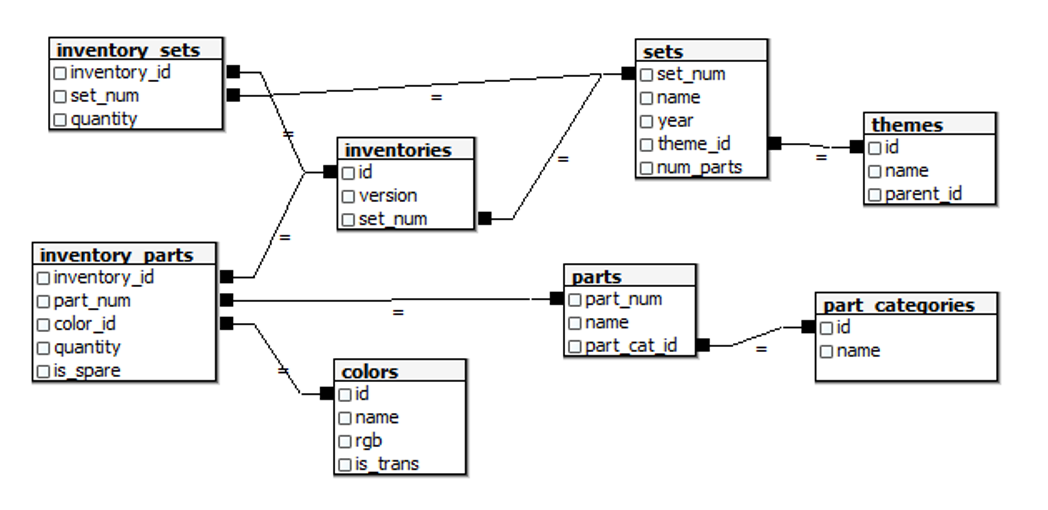


# 2. Importing

In [3]:
#This is a list of all the colours
colors = pd.read_csv("legodata/colors.csv")
#Inventories, when a set got an update there were different versions of the inventories. 
inv = pd.read_csv("legodata/inventories.csv")
#Inventory is the bag of lego that comes inside the box. Sometimes there are 3 or 4 bags
inv_parts = pd.read_csv("legodata/inventory_parts.csv")
#This links the inventory bags to the sets
inv_sets = pd.read_csv("legodata/inventory_sets.csv")
#Individual parts, actual Lego pieces
parts = pd.read_csv("legodata/parts.csv")
#types of each part e.g. plate or brick or man
part_cats = pd.read_csv("legodata/part_categories.csv")
#this is the sets that are actually sold in shops.
sets = pd.read_csv("legodata/sets.csv")
#These are the different themes of Lego e.g. Ninjago, Harry Potter, City
themes = pd.read_csv("legodata/themes.csv")

We can quickly have a look at a few rows from all the data and get a fee.

In [4]:
#You can use the .head function to view the first few rows of the data. It can help to get a feel for the data.
print(colors.head)
print(inv.head)
print(inv_parts.head)
print(inv_sets.head)
print(parts.head)
print(part_cats.head)
print(sets.head)
print(themes.head)


<bound method NDFrame.head of        id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]>
<bound method NDFrame.head of           id  version    set_num
0         35        1  5004559-1
1         36        1     1756-1
2         37        1     8931-1
3         38        1     9385-1
4         39        1    66512-1
...      ...      ...        ...


The data looks great. Super well formed and linked together nicely with a correctly functioning primary and foreign key system. 
We can find out the dimensions of each set of data that we have. 

In [5]:
print("Colors shape:", colors.shape)
print("Inventories shape: ", inv.shape)
print("Inventory Parts shape:", inv_parts.shape)
print("Inventory Sets shape:", inv_sets.shape)
print("Parts shape:", parts.shape)
print("Part Categories shape:", part_cats.shape)
print("Sets shape:", sets.shape)
print("Themes shape:", themes.shape)

Colors shape: (135, 4)
Inventories shape:  (11662, 3)
Inventory Parts shape: (580251, 5)
Inventory Sets shape: (2846, 3)
Parts shape: (25993, 3)
Part Categories shape: (57, 2)
Sets shape: (11673, 5)
Themes shape: (614, 3)


Have a look at some of the data from colours.

In [6]:
colors.describe(include='all')

,id,name,rgb,is_trans
count,135.000000,135,135,135
unique,NaN,135,124,2
top,NaN,Very Light Bluish Gray,000000,f
freq,NaN,1,3,107
mean,253.037037,NaN,NaN,NaN
std,878.441466,NaN,NaN,NaN
min,-1.000000,NaN,NaN,NaN
25%,34.500000,NaN,NaN,NaN
50%,85.000000,NaN,NaN,NaN
75%,231.000000,NaN,NaN,NaN


In [7]:
sets.describe(include='all')

,set_num,name,year,theme_id,num_parts
count,11673,11673,11673.000000,11673.000000,11673.000000
unique,11673,10370,NaN,NaN,NaN
top,4841-1,Basic Building Set,NaN,NaN,NaN
freq,1,55,NaN,NaN,NaN
mean,NaN,NaN,2001.972758,311.308575,162.262400
std,NaN,NaN,13.475364,177.999101,330.192108
min,NaN,NaN,1950.000000,1.000000,-1.000000
25%,NaN,NaN,1997.000000,161.000000,10.000000
50%,NaN,NaN,2005.000000,324.000000,45.000000
75%,NaN,NaN,2012.000000,470.000000,172.000000


Looking at this we can see our main dataset is probably going to be Inventory Parts (inv_parts). Which makes sense, it's a dataset that contains what part belongs in which inventory. 
An inventory is the bag that comes in a box of Lego. Sometimes there's more than one bag(inventory) in a box(set).
One non obvious column is parent_ID in themes. This is infact the parent ID of that theme. Which is self referenceing. So forinstnace, you could have a "Space" theme, ID 126, but "Ice Planet 2002" ID 133 is also a theme, but it's parent theme is "Space".

Next we look at the datatypes used. 

# 3: Preperation

In [8]:
print("Colors datatypes:", colors.dtypes)
print("Inventories datatypes: ", inv.dtypes)
print("Inventory Parts datatypes:", inv_parts.dtypes)
print("Inventory Sets datatypes:", inv_sets.dtypes)
print("Parts datatypes:", parts.dtypes)
print("Part Categories datatypes:", part_cats.dtypes)
print("Sets datatypes:", sets.dtypes)
print("Themes datatypes:", themes.dtypes)

Colors datatypes: id           int64
name        object
rgb         object
is_trans    object
dtype: object
Inventories datatypes:  id          int64
version     int64
set_num    object
dtype: object
Inventory Parts datatypes: inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
dtype: object
Inventory Sets datatypes: inventory_id     int64
set_num         object
quantity         int64
dtype: object
Parts datatypes: part_num       object
name           object
part_cat_id     int64
dtype: object
Part Categories datatypes: id       int64
name    object
dtype: object
Sets datatypes: set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object
Themes datatypes: id             int64
name          object
parent_id    float64
dtype: object


The data looks pretty straightforward. it's mostly integers, with the occasional float and then objects as text. 

# 4. Analysis / 5. Visualisation 

## Observations
Next we'll do a few observations on the data. To do this we'll need to join a few of the dataframes together. 


In [9]:
print("Colors datatypes:", colors.dtypes)
print("Inventory Parts datatypes:", inv_parts.dtypes)

Colors datatypes: id           int64
name        object
rgb         object
is_trans    object
dtype: object
Inventory Parts datatypes: inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
dtype: object


What if we want to see what sets years had the most sets

In [10]:
sets_by_year = sets.groupby('year').count()

What if we want to see how many sets were released, we'd need to group by year. 
Here I've created a new field, added it to a new dataframe i created just to keep things simple.

In [11]:
setsWithTotals = sets.copy(deep=True)
setsWithTotals['setsReleasedPerYear'] = setsWithTotals.groupby('year')['year'].transform('count')
print(setsWithTotals.head)

<bound method NDFrame.head of              set_num                                               name  year  \
0               00-1                                    Weetabix Castle  1970   
1             0011-2                                  Town Mini-Figures  1978   
2             0011-3                         Castle 2 for 1 Bonus Offer  1987   
3             0012-1                                 Space Mini-Figures  1979   
4             0013-1                                 Space Mini-Figures  1979   
...              ...                                                ...   ...   
11668    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...  2012   
11669   WHITEHOUSE-1                                  Micro White House  2015   
11670    Wiesbaden-1  LEGO Store Grand Opening Exclusive Set, Wiesba...  2010   
11671  WishingWell-1                     Wishing Well [Toys R Us Promo]  2013   
11672        wwgp1-1                Wild West Limited Edition Gift Pack  1996  

In [12]:
setsWithTotals.sort_values('setsReleasedPerYear', ascending=False)

,set_num,name,year,theme_id,num_parts,setsReleasedPerYear
4685,5002914-1,THE LEGO® MOVIE™ Emmet Key Light,2014,503,0,713
3778,42030-1,Remote-Controlled Volvo L350F Wheel Loader,2014,7,1634,713
7003,70133-1,Spinlyn's Cavern,2014,571,406,713
7002,70132-1,Scorm's Scorpion Stinger,2014,571,433,713
7001,70131-1,Rogon's Rock Flinger,2014,571,256,713
...,...,...,...,...,...,...
6955,700.B-1,Early LEGO Windows/Doors (without Glass),1953,371,12,4
6967,700.F-1,Automatic Binding Bricks - Small Brick Set (Le...,1953,371,48,4
1672,238-1,Lego System Idea Book no. 1,1960,497,0,3
6973,700K-1,Kindergarten LEGO Set,1960,513,476,3


It's kind of hard to make out what's going on, maybe a graph would make it clearer?

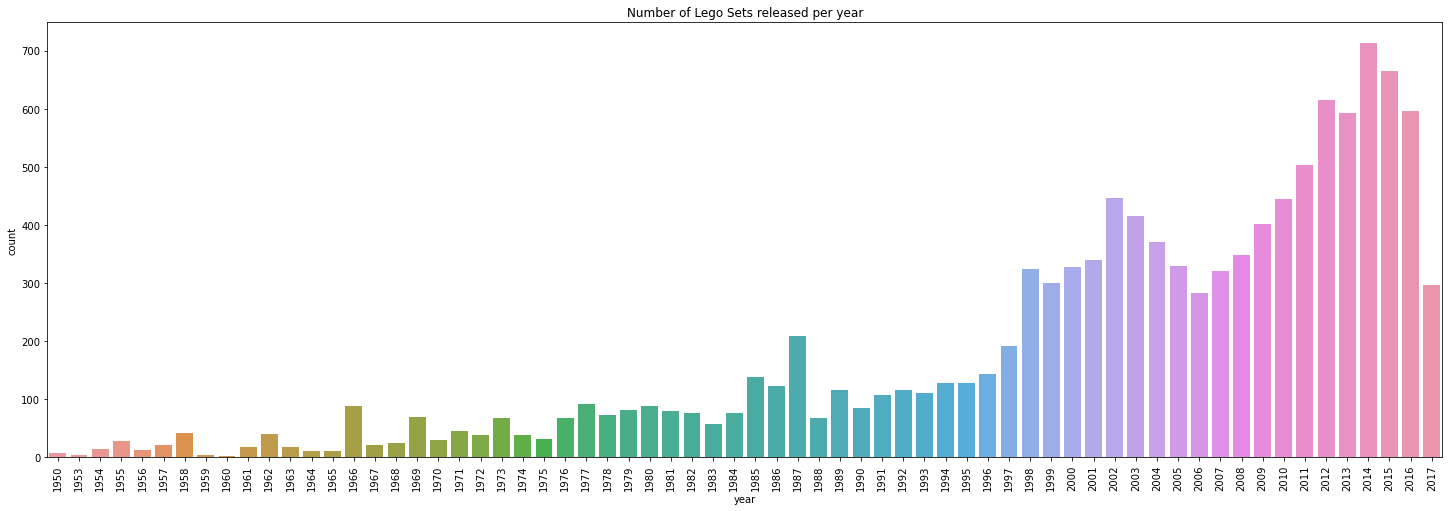

In [13]:
ax = plt.subplots(1,1,figsize=(25, 8))
sb.countplot(x = sets['year'],)
plt.xticks(rotation=90)
plt.title('Number of Lego Sets released per year')
plt.show()

As you can see there was a clear increase in the number of sets being released each year. They seemed to have tapered off in 2015, 2016. 
This data set is from 2017, we don't know when, but it's possible it was mid year. 
So 2017 can be ignored.

Maybe we have a closer look at data from after the year 2000

In [14]:
#creates a panda series
year = setsWithTotals["year"]
after2k = year > 2000
setsAfter2k = setsWithTotals[after2k]
print(setsAfter2k)




             set_num                                               name  year  \
25           10000-1                                        Guarded Inn  2001   
26           10001-1                                         Metroliner  2001   
27           10002-1                                  Railroad Club Car  2001   
28           10003-1                              1 x 2 Sand Red Bricks  2001   
29           10004-1                              2 x 2 Sand Red Bricks  2001   
...              ...                                                ...   ...   
11667      Watford-1  LEGO Store Grand Opening Exclusive Set, Watfor...  2013   
11668    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...  2012   
11669   WHITEHOUSE-1                                  Micro White House  2015   
11670    Wiesbaden-1  LEGO Store Grand Opening Exclusive Set, Wiesba...  2010   
11671  WishingWell-1                     Wishing Well [Toys R Us Promo]  2013   

       theme_id  num_parts 

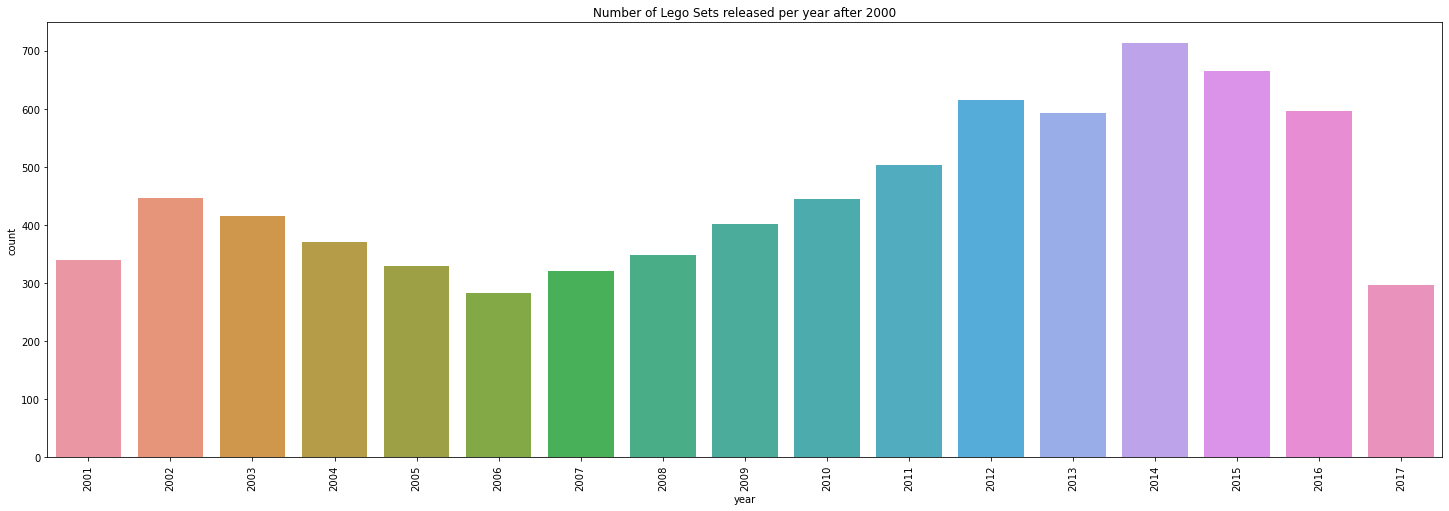

In [15]:
ax = plt.subplots(1,1,figsize=(25, 8))
sb.countplot(x = setsAfter2k['year'],)
plt.xticks(rotation=90)
plt.title('Number of Lego Sets released per year after 2000')
plt.show()

In [16]:
#Check datatype as we're getting errors on the merge
print(inv_parts.color_id.dtype)
print(colors.id.dtype)

int64
int64


I added an ID column to inv_parts and inv_sets.
The tables have a composite key which would make them difficult to deal with later. 

In [17]:
colors.set_index("id")
inv.set_index("id")
inv_parts["id"] = inv_parts.index + 1
inv_parts.set_index("id")
inv_sets["id"] = inv_sets.index + 1
inv_sets.set_index("id")
parts.set_index("part_num")
part_cats.set_index("id")
#sets.set_index("set_num") this doesn't seem to work for some reason.
themes.set_index("id")


,name,parent_id
id,,
1,Technic,NaN
2,Arctic Technic,1.0
3,Competition,1.0
4,Expert Builder,1.0
5,Model,1.0
...,...,...
610,Brickheadz,NaN
611,Series 17 Minifigures,535.0
612,Star Wars Episode 8,158.0


Now, we'll have a look at the number of parts per set.


In [18]:
for index, row in sets.iterrows():
    {
        print("Row number: ", index, "Set number:", row['set_num'], " number of parts: ", row['num_parts'])
    }

Row number:  0 Set number: 00-1  number of parts:  471
Row number:  1 Set number: 0011-2  number of parts:  12
Row number:  2 Set number: 0011-3  number of parts:  2
Row number:  3 Set number: 0012-1  number of parts:  12
Row number:  4 Set number: 0013-1  number of parts:  12
Row number:  5 Set number: 0014-1  number of parts:  12
Row number:  6 Set number: 0015-1  number of parts:  18
Row number:  7 Set number: 0016-1  number of parts:  15
Row number:  8 Set number: 00-2  number of parts:  147
Row number:  9 Set number: 00-3  number of parts:  149
Row number:  10 Set number: 00-4  number of parts:  126
Row number:  11 Set number: 005-1  number of parts:  35
Row number:  12 Set number: 00-6  number of parts:  3
Row number:  13 Set number: 00-7  number of parts:  3
Row number:  14 Set number: 010-1  number of parts:  57
Row number:  15 Set number: 010-3  number of parts:  77
Row number:  16 Set number: 011-1  number of parts:  145
Row number:  17 Set number: 022-1  number of parts:  11

Row number:  334 Set number: 10599-1  number of parts:  46
Row number:  335 Set number: 10600-1  number of parts:  29
Row number:  336 Set number: 1060-1  number of parts:  30
Row number:  337 Set number: 10601-1  number of parts:  19
Row number:  338 Set number: 10602-1  number of parts:  37
Row number:  339 Set number: 10603-1  number of parts:  17
Row number:  340 Set number: 10604-1  number of parts:  25
Row number:  341 Set number: 10605-1  number of parts:  16
Row number:  342 Set number: 10606-1  number of parts:  39
Row number:  343 Set number: 10607-1  number of parts:  13
Row number:  344 Set number: 10608-1  number of parts:  28
Row number:  345 Set number: 106-1  number of parts:  59
Row number:  346 Set number: 1061-1  number of parts:  1
Row number:  347 Set number: 10615-1  number of parts:  12
Row number:  348 Set number: 10616-1  number of parts:  25
Row number:  349 Set number: 10617-1  number of parts:  26
Row number:  350 Set number: 10618-1  number of parts:  69
Ro

Row number:  803 Set number: 1318-1  number of parts:  68
Row number:  804 Set number: 1319-1  number of parts:  22
Row number:  805 Set number: 13-2  number of parts:  92
Row number:  806 Set number: 1320-1  number of parts:  32
Row number:  807 Set number: 132-1  number of parts:  115
Row number:  808 Set number: 1321-1  number of parts:  22
Row number:  809 Set number: 132-2  number of parts:  58
Row number:  810 Set number: 1322-1  number of parts:  32
Row number:  811 Set number: 1323-1  number of parts:  24
Row number:  812 Set number: 1324-1  number of parts:  101
Row number:  813 Set number: 1325-1  number of parts:  68
Row number:  814 Set number: 1326-1  number of parts:  28
Row number:  815 Set number: 1327-1  number of parts:  48
Row number:  816 Set number: 1328-1  number of parts:  32
Row number:  817 Set number: 1329-1  number of parts:  28
Row number:  818 Set number: 13-3  number of parts:  5
Row number:  819 Set number: 1330-1  number of parts:  20
Row number:  820 Se

Row number:  969 Set number: 1528-1  number of parts:  29
Row number:  970 Set number: 153-1  number of parts:  15
Row number:  971 Set number: 154-1  number of parts:  4
Row number:  972 Set number: 1544-1  number of parts:  57
Row number:  973 Set number: 1545-1  number of parts:  29
Row number:  974 Set number: 1546-1  number of parts:  31
Row number:  975 Set number: 1547-1  number of parts:  58
Row number:  976 Set number: 1548-1  number of parts:  173
Row number:  977 Set number: 1549-1  number of parts:  62
Row number:  978 Set number: 1550-1  number of parts:  49
Row number:  979 Set number: 155-1  number of parts:  14
Row number:  980 Set number: 1551-1  number of parts:  6
Row number:  981 Set number: 1551-2  number of parts:  49
Row number:  982 Set number: 1552-1  number of parts:  377
Row number:  983 Set number: 1552-2  number of parts:  45
Row number:  984 Set number: 1554-1  number of parts:  175
Row number:  985 Set number: 1555-1  number of parts:  19
Row number:  986

Row number:  1303 Set number: 1968-1  number of parts:  183
Row number:  1304 Set number: 1969-1  number of parts:  38
Row number:  1305 Set number: 1969-2  number of parts:  3
Row number:  1306 Set number: 1970-1  number of parts:  31
Row number:  1307 Set number: 197-1  number of parts:  120
Row number:  1308 Set number: 1971-1  number of parts:  36
Row number:  1309 Set number: 1972-1  number of parts:  98
Row number:  1310 Set number: 1973-1  number of parts:  138
Row number:  1311 Set number: 1974-1  number of parts:  3
Row number:  1312 Set number: 1974-2  number of parts:  74
Row number:  1313 Set number: 1974-3  number of parts:  50
Row number:  1314 Set number: 1974-4  number of parts:  37
Row number:  1315 Set number: 1976-1  number of parts:  3
Row number:  1316 Set number: 1977-1  number of parts:  3
Row number:  1317 Set number: 1978-1  number of parts:  39
Row number:  1318 Set number: 1978-2  number of parts:  3
Row number:  1319 Set number: 1979-1  number of parts:  42


Row number:  1469 Set number: 21119-1  number of parts:  219
Row number:  1470 Set number: 211-2  number of parts:  19
Row number:  1471 Set number: 21120-1  number of parts:  327
Row number:  1472 Set number: 2112-1  number of parts:  18
Row number:  1473 Set number: 21121-1  number of parts:  518
Row number:  1474 Set number: 21122-1  number of parts:  570
Row number:  1475 Set number: 21123-1  number of parts:  208
Row number:  1476 Set number: 21124-1  number of parts:  558
Row number:  1477 Set number: 21125-1  number of parts:  706
Row number:  1478 Set number: 21126-1  number of parts:  318
Row number:  1479 Set number: 21127-1  number of parts:  982
Row number:  1480 Set number: 21128-1  number of parts:  1596
Row number:  1481 Set number: 21129-1  number of parts:  247
Row number:  1482 Set number: 21130-1  number of parts:  387
Row number:  1483 Set number: 2113-1  number of parts:  19
Row number:  1484 Set number: 21131-1  number of parts:  454
Row number:  1485 Set number: 

Row number:  1802 Set number: 2824-14  number of parts:  15
Row number:  1803 Set number: 2824-15  number of parts:  5
Row number:  1804 Set number: 2824-16  number of parts:  13
Row number:  1805 Set number: 2824-17  number of parts:  9
Row number:  1806 Set number: 2824-18  number of parts:  9
Row number:  1807 Set number: 2824-19  number of parts:  6
Row number:  1808 Set number: 2824-2  number of parts:  11
Row number:  1809 Set number: 2824-20  number of parts:  15
Row number:  1810 Set number: 2824-21  number of parts:  17
Row number:  1811 Set number: 2824-22  number of parts:  15
Row number:  1812 Set number: 2824-23  number of parts:  7
Row number:  1813 Set number: 2824-24  number of parts:  23
Row number:  1814 Set number: 2824-25  number of parts:  21
Row number:  1815 Set number: 2824-3  number of parts:  5
Row number:  1816 Set number: 2824-4  number of parts:  10
Row number:  1817 Set number: 2824-5  number of parts:  15
Row number:  1818 Set number: 2824-6  number of pa

Row number:  1969 Set number: 30056-1  number of parts:  38
Row number:  1970 Set number: 30057-1  number of parts:  38
Row number:  1971 Set number: 30058-1  number of parts:  19
Row number:  1972 Set number: 30059-1  number of parts:  51
Row number:  1973 Set number: 30061-1  number of parts:  36
Row number:  1974 Set number: 30062-1  number of parts:  31
Row number:  1975 Set number: 30066-1  number of parts:  3
Row number:  1976 Set number: 30066-2  number of parts:  3
Row number:  1977 Set number: 30066-4  number of parts:  3
Row number:  1978 Set number: 30066-5  number of parts:  3
Row number:  1979 Set number: 30067-1  number of parts:  5
Row number:  1980 Set number: 30067-2  number of parts:  5
Row number:  1981 Set number: 30067-3  number of parts:  5
Row number:  1982 Set number: 30067-4  number of parts:  5
Row number:  1983 Set number: 30068-1  number of parts:  6
Row number:  1984 Set number: 30070-1  number of parts:  29
Row number:  1985 Set number: 30071-1  number of 

Row number:  2302 Set number: 31043-1  number of parts:  124
Row number:  2303 Set number: 31044-1  number of parts:  202
Row number:  2304 Set number: 31045-1  number of parts:  213
Row number:  2305 Set number: 31046-1  number of parts:  222
Row number:  2306 Set number: 31047-1  number of parts:  230
Row number:  2307 Set number: 31048-1  number of parts:  371
Row number:  2308 Set number: 31049-1  number of parts:  326
Row number:  2309 Set number: 310-5  number of parts:  96
Row number:  2310 Set number: 31050-1  number of parts:  467
Row number:  2311 Set number: 31051-1  number of parts:  527
Row number:  2312 Set number: 31052-1  number of parts:  791
Row number:  2313 Set number: 31053-1  number of parts:  387
Row number:  2314 Set number: 31054-1  number of parts:  71
Row number:  2315 Set number: 31055-1  number of parts:  72
Row number:  2316 Set number: 31056-1  number of parts:  122
Row number:  2317 Set number: 31057-1  number of parts:  102
Row number:  2318 Set number:

Row number:  2469 Set number: 3345-1  number of parts:  24
Row number:  2470 Set number: 3346-1  number of parts:  26
Row number:  2471 Set number: 3347-1  number of parts:  8
Row number:  2472 Set number: 3348-1  number of parts:  23
Row number:  2473 Set number: 3349-1  number of parts:  29
Row number:  2474 Set number: 3350-1  number of parts:  27
Row number:  2475 Set number: 335-1  number of parts:  245
Row number:  2476 Set number: 3351-1  number of parts:  24
Row number:  2477 Set number: 335-2  number of parts:  99
Row number:  2478 Set number: 336-1  number of parts:  76
Row number:  2479 Set number: 3365-1  number of parts:  37
Row number:  2480 Set number: 3366-1  number of parts:  164
Row number:  2481 Set number: 3367-1  number of parts:  230
Row number:  2482 Set number: 3368-1  number of parts:  498
Row number:  2483 Set number: 337-1  number of parts:  225
Row number:  2484 Set number: 337-2  number of parts:  92
Row number:  2485 Set number: 3380-1  number of parts:  5

Row number:  2802 Set number: 3733-1  number of parts:  20
Row number:  2803 Set number: 3734-1  number of parts:  20
Row number:  2804 Set number: 3735-1  number of parts:  20
Row number:  2805 Set number: 3736-1  number of parts:  20
Row number:  2806 Set number: 3737-1  number of parts:  15
Row number:  2807 Set number: 3738-1  number of parts:  10
Row number:  2808 Set number: 3739-1  number of parts:  629
Row number:  2809 Set number: 3740-1  number of parts:  66
Row number:  2810 Set number: 374-1  number of parts:  334
Row number:  2811 Set number: 3741-1  number of parts:  91
Row number:  2812 Set number: 374-2  number of parts:  73
Row number:  2813 Set number: 3742-1  number of parts:  41
Row number:  2814 Set number: 3743-1  number of parts:  106
Row number:  2815 Set number: 3744-1  number of parts:  106
Row number:  2816 Set number: 3745-1  number of parts:  106
Row number:  2817 Set number: 3746-1  number of parts:  106
Row number:  2818 Set number: 3747-1  number of part

Row number:  2969 Set number: 3937-1  number of parts:  64
Row number:  2970 Set number: 3938-1  number of parts:  64
Row number:  2971 Set number: 3939-1  number of parts:  86
Row number:  2972 Set number: 394-1  number of parts:  142
Row number:  2973 Set number: 3942-1  number of parts:  202
Row number:  2974 Set number: 3948-1  number of parts:  0
Row number:  2975 Set number: 395-1  number of parts:  283
Row number:  2976 Set number: 396-1  number of parts:  433
Row number:  2977 Set number: 3961-1  number of parts:  0
Row number:  2978 Set number: 398-1  number of parts:  973
Row number:  2979 Set number: 3983-1  number of parts:  0
Row number:  2980 Set number: 4000001-1  number of parts:  794
Row number:  2981 Set number: 4000002-1  number of parts:  174
Row number:  2982 Set number: 4000005-1  number of parts:  315
Row number:  2983 Set number: 4000006-1  number of parts:  278
Row number:  2984 Set number: 4000007-1  number of parts:  909
Row number:  2985 Set number: 4000008-

Row number:  3328 Set number: 41011-1  number of parts:  82
Row number:  3329 Set number: 41013-1  number of parts:  163
Row number:  3330 Set number: 41015-1  number of parts:  631
Row number:  3331 Set number: 41016-1  number of parts:  24
Row number:  3332 Set number: 41016-10  number of parts:  19
Row number:  3333 Set number: 41016-11  number of parts:  20
Row number:  3334 Set number: 41016-12  number of parts:  3
Row number:  3335 Set number: 41016-13  number of parts:  8
Row number:  3336 Set number: 41016-14  number of parts:  8
Row number:  3337 Set number: 41016-15  number of parts:  6
Row number:  3338 Set number: 41016-16  number of parts:  11
Row number:  3339 Set number: 41016-17  number of parts:  15
Row number:  3340 Set number: 41016-18  number of parts:  8
Row number:  3341 Set number: 41016-19  number of parts:  8
Row number:  3342 Set number: 41016-2  number of parts:  4
Row number:  3343 Set number: 41016-20  number of parts:  4
Row number:  3344 Set number: 41016

Row number:  3497 Set number: 41130-1  number of parts:  1122
Row number:  3498 Set number: 4113-1  number of parts:  124
Row number:  3499 Set number: 41131-1  number of parts:  218
Row number:  3500 Set number: 41132-1  number of parts:  175
Row number:  3501 Set number: 41133-1  number of parts:  423
Row number:  3502 Set number: 41134-1  number of parts:  772
Row number:  3503 Set number: 41135-1  number of parts:  596
Row number:  3504 Set number: 41140-1  number of parts:  97
Row number:  3505 Set number: 41141-1  number of parts:  79
Row number:  3506 Set number: 41142-1  number of parts:  185
Row number:  3507 Set number: 41143-1  number of parts:  43
Row number:  3508 Set number: 41144-1  number of parts:  74
Row number:  3509 Set number: 41147-1  number of parts:  153
Row number:  3510 Set number: 41148-1  number of parts:  700
Row number:  3511 Set number: 41149-1  number of parts:  205
Row number:  3512 Set number: 41150-1  number of parts:  307
Row number:  3513 Set number

Row number:  3870 Set number: 4282-1  number of parts:  37
Row number:  3871 Set number: 4283-1  number of parts:  53
Row number:  3872 Set number: 4284-1  number of parts:  123
Row number:  3873 Set number: 4285-1  number of parts:  256
Row number:  3874 Set number: 4285968-1  number of parts:  47
Row number:  3875 Set number: 4285969-1  number of parts:  47
Row number:  3876 Set number: 4285970-1  number of parts:  47
Row number:  3877 Set number: 4286013-1  number of parts:  10
Row number:  3878 Set number: 4286024-1  number of parts:  10
Row number:  3879 Set number: 4286025-1  number of parts:  10
Row number:  3880 Set number: 4286784-1  number of parts:  6
Row number:  3881 Set number: 4287082-1  number of parts:  10
Row number:  3882 Set number: 4287744-1  number of parts:  0
Row number:  3883 Set number: 4288-1  number of parts:  404
Row number:  3884 Set number: 429-1  number of parts:  4
Row number:  3885 Set number: 4291-1  number of parts:  770
Row number:  3886 Set number:

Row number:  4022 Set number: 4444-1  number of parts:  4
Row number:  4023 Set number: 4445-1  number of parts:  4
Row number:  4024 Set number: 4446-1  number of parts:  4
Row number:  4025 Set number: 4447-1  number of parts:  4
Row number:  4026 Set number: 4448-1  number of parts:  4
Row number:  4027 Set number: 4449-1  number of parts:  4
Row number:  4028 Set number: 4450-1  number of parts:  4
Row number:  4029 Set number: 445062-1  number of parts:  2
Row number:  4030 Set number: 445-1  number of parts:  49
Row number:  4031 Set number: 4451-1  number of parts:  4
Row number:  4032 Set number: 445-2  number of parts:  3
Row number:  4033 Set number: 4452-1  number of parts:  4
Row number:  4034 Set number: 4453-1  number of parts:  4
Row number:  4035 Set number: 4454-1  number of parts:  6
Row number:  4036 Set number: 4455-1  number of parts:  6
Row number:  4037 Set number: 4456-1  number of parts:  5
Row number:  4038 Set number: 4457-1  number of parts:  4
Row number:  

Row number:  4369 Set number: 4737-1  number of parts:  153
Row number:  4370 Set number: 4738-1  number of parts:  442
Row number:  4371 Set number: 4741-1  number of parts:  4
Row number:  4372 Set number: 4742-1  number of parts:  57
Row number:  4373 Set number: 4743-1  number of parts:  103
Row number:  4374 Set number: 4744-1  number of parts:  140
Row number:  4375 Set number: 4745-1  number of parts:  257
Row number:  4376 Set number: 4746-1  number of parts:  425
Row number:  4377 Set number: 4748-1  number of parts:  413
Row number:  4378 Set number: 4750-1  number of parts:  37
Row number:  4379 Set number: 4751-1  number of parts:  108
Row number:  4380 Set number: 4752-1  number of parts:  158
Row number:  4381 Set number: 4753-1  number of parts:  192
Row number:  4382 Set number: 4754-1  number of parts:  296
Row number:  4383 Set number: 4755-1  number of parts:  244
Row number:  4384 Set number: 4756-1  number of parts:  450
Row number:  4385 Set number: 4757-1  number

Row number:  4507 Set number: 4920-1  number of parts:  39
Row number:  4508 Set number: 492-1  number of parts:  59
Row number:  4509 Set number: 492-2  number of parts:  8
Row number:  4510 Set number: 4924-1  number of parts:  24
Row number:  4511 Set number: 4924-10  number of parts:  16
Row number:  4512 Set number: 4924-11  number of parts:  14
Row number:  4513 Set number: 4924-12  number of parts:  14
Row number:  4514 Set number: 4924-13  number of parts:  7
Row number:  4515 Set number: 4924-14  number of parts:  12
Row number:  4516 Set number: 4924-15  number of parts:  13
Row number:  4517 Set number: 4924-16  number of parts:  9
Row number:  4518 Set number: 4924-17  number of parts:  14
Row number:  4519 Set number: 4924-18  number of parts:  13
Row number:  4520 Set number: 4924-19  number of parts:  23
Row number:  4521 Set number: 4924-2  number of parts:  15
Row number:  4522 Set number: 4924-20  number of parts:  13
Row number:  4523 Set number: 4924-21  number of p

Row number:  4718 Set number: 5003565-1  number of parts:  0
Row number:  4719 Set number: 5003566-1  number of parts:  0
Row number:  4720 Set number: 5003568-1  number of parts:  0
Row number:  4721 Set number: 5003569-1  number of parts:  0
Row number:  4722 Set number: 5003570-1  number of parts:  0
Row number:  4723 Set number: 5003574-1  number of parts:  0
Row number:  4724 Set number: 5003575-1  number of parts:  0
Row number:  4725 Set number: 5003576-1  number of parts:  0
Row number:  4726 Set number: 5003578-1  number of parts:  0
Row number:  4727 Set number: 5003579-1  number of parts:  0
Row number:  4728 Set number: 5003580-1  number of parts:  0
Row number:  4729 Set number: 5003582-1  number of parts:  0
Row number:  4730 Set number: 5003583-1  number of parts:  0
Row number:  4731 Set number: 5003584-1  number of parts:  0
Row number:  4732 Set number: 5003586-1  number of parts:  0
Row number:  4733 Set number: 5004064-1  number of parts:  0
Row number:  4734 Set nu

Row number:  4968 Set number: 5156-1  number of parts:  17
Row number:  4969 Set number: 5157-1  number of parts:  32
Row number:  4970 Set number: 5158-1  number of parts:  2
Row number:  4971 Set number: 5159-1  number of parts:  2
Row number:  4972 Set number: 5160-1  number of parts:  21
Row number:  4973 Set number: 5161-1  number of parts:  16
Row number:  4974 Set number: 5162-1  number of parts:  10
Row number:  4975 Set number: 5163-1  number of parts:  8
Row number:  4976 Set number: 5164-1  number of parts:  20
Row number:  4977 Set number: 5165-1  number of parts:  32
Row number:  4978 Set number: 5166-1  number of parts:  18
Row number:  4979 Set number: 5167-1  number of parts:  16
Row number:  4980 Set number: 5168-1  number of parts:  4
Row number:  4981 Set number: 5169-1  number of parts:  7
Row number:  4982 Set number: 517-1  number of parts:  123
Row number:  4983 Set number: 5171-1  number of parts:  28
Row number:  4984 Set number: 5172-1  number of parts:  30
Ro

Row number:  5254 Set number: 5515-1  number of parts:  240
Row number:  5255 Set number: 5517-1  number of parts:  1800
Row number:  5256 Set number: 5519-1  number of parts:  485
Row number:  5257 Set number: 552-1  number of parts:  2
Row number:  5258 Set number: 5521-1  number of parts:  400
Row number:  5259 Set number: 5522-1  number of parts:  700
Row number:  5260 Set number: 5524-1  number of parts:  606
Row number:  5261 Set number: 5525-1  number of parts:  1339
Row number:  5262 Set number: 5526-1  number of parts:  2792
Row number:  5263 Set number: 5528-1  number of parts:  700
Row number:  5264 Set number: 5529-1  number of parts:  326
Row number:  5265 Set number: 5529-2  number of parts:  326
Row number:  5266 Set number: 553-1  number of parts:  2
Row number:  5267 Set number: 5531-1  number of parts:  18
Row number:  5268 Set number: 5532-1  number of parts:  32
Row number:  5269 Set number: 5533-1  number of parts:  394
Row number:  5270 Set number: 5537-1  number 

Row number:  5489 Set number: 5928-1  number of parts:  70
Row number:  5490 Set number: 5929-1  number of parts:  145
Row number:  5491 Set number: 5930-1  number of parts:  121
Row number:  5492 Set number: 5932-1  number of parts:  227
Row number:  5493 Set number: 5933-1  number of parts:  309
Row number:  5494 Set number: 5934-1  number of parts:  90
Row number:  5495 Set number: 5935-1  number of parts:  205
Row number:  5496 Set number: 5936-1  number of parts:  129
Row number:  5497 Set number: 5938-1  number of parts:  82
Row number:  5498 Set number: 5940-1  number of parts:  207
Row number:  5499 Set number: 5941-1  number of parts:  176
Row number:  5500 Set number: 5942-1  number of parts:  102
Row number:  5501 Set number: 5943-1  number of parts:  94
Row number:  5502 Set number: 5944-1  number of parts:  32
Row number:  5503 Set number: 5945-1  number of parts:  13
Row number:  5504 Set number: 5946-1  number of parts:  26
Row number:  5505 Set number: 5948-1  number of

Row number:  5759 Set number: 6018-1  number of parts:  54
Row number:  5760 Set number: 6020-1  number of parts:  47
Row number:  5761 Set number: 602-1  number of parts:  24
Row number:  5762 Set number: 6021-1  number of parts:  37
Row number:  5763 Set number: 602-2  number of parts:  30
Row number:  5764 Set number: 6022-1  number of parts:  43
Row number:  5765 Set number: 6023-1  number of parts:  45
Row number:  5766 Set number: 6024-1  number of parts:  60
Row number:  5767 Set number: 6026-1  number of parts:  21
Row number:  5768 Set number: 6027-1  number of parts:  54
Row number:  5769 Set number: 6028-1  number of parts:  23
Row number:  5770 Set number: 6029-1  number of parts:  23
Row number:  5771 Set number: 6030-1  number of parts:  83
Row number:  5772 Set number: 603-1  number of parts:  26
Row number:  5773 Set number: 6031-1  number of parts:  28
Row number:  5774 Set number: 6032-1  number of parts:  56
Row number:  5775 Set number: 603-3  number of parts:  36
R

Row number:  6026 Set number: 629-1  number of parts:  3
Row number:  6027 Set number: 6291-1  number of parts:  291
Row number:  6028 Set number: 6292-1  number of parts:  445
Row number:  6029 Set number: 6293-1  number of parts:  56
Row number:  6030 Set number: 6296-1  number of parts:  226
Row number:  6031 Set number: 6299-1  number of parts:  24
Row number:  6032 Set number: 6299-10  number of parts:  7
Row number:  6033 Set number: 6299-11  number of parts:  3
Row number:  6034 Set number: 6299-12  number of parts:  7
Row number:  6035 Set number: 6299-13  number of parts:  9
Row number:  6036 Set number: 6299-14  number of parts:  2
Row number:  6037 Set number: 6299-15  number of parts:  4
Row number:  6038 Set number: 6299-16  number of parts:  6
Row number:  6039 Set number: 6299-17  number of parts:  8
Row number:  6040 Set number: 6299-18  number of parts:  6
Row number:  6041 Set number: 6299-19  number of parts:  9
Row number:  6042 Set number: 6299-2  number of parts: 

Row number:  6301 Set number: 6518-1  number of parts:  37
Row number:  6302 Set number: 65182-1  number of parts:  25
Row number:  6303 Set number: 65186-1  number of parts:  3
Row number:  6304 Set number: 6519-1  number of parts:  46
Row number:  6305 Set number: 6520-1  number of parts:  218
Row number:  6306 Set number: 6521-1  number of parts:  58
Row number:  6307 Set number: 652-2  number of parts:  42
Row number:  6308 Set number: 6522-1  number of parts:  38
Row number:  6309 Set number: 65221-1  number of parts:  2
Row number:  6310 Set number: 65229-1  number of parts:  3
Row number:  6311 Set number: 65230-1  number of parts:  3
Row number:  6312 Set number: 6523-1  number of parts:  51
Row number:  6313 Set number: 6524-1  number of parts:  50
Row number:  6314 Set number: 6525-1  number of parts:  49
Row number:  6315 Set number: 65258-1  number of parts:  4
Row number:  6316 Set number: 6526-1  number of parts:  47
Row number:  6317 Set number: 6527-1  number of parts: 

Row number:  6551 Set number: 66405-1  number of parts:  4
Row number:  6552 Set number: 66409-1  number of parts:  3
Row number:  6553 Set number: 664-1  number of parts:  47
Row number:  6554 Set number: 66410-1  number of parts:  3
Row number:  6555 Set number: 6641-1  number of parts:  81
Row number:  6556 Set number: 66411-1  number of parts:  3
Row number:  6557 Set number: 66412-1  number of parts:  2
Row number:  6558 Set number: 66414-1  number of parts:  2
Row number:  6559 Set number: 6642-1  number of parts:  65
Row number:  6560 Set number: 66426-1  number of parts:  3
Row number:  6561 Set number: 66427-1  number of parts:  4
Row number:  6562 Set number: 66428-1  number of parts:  4
Row number:  6563 Set number: 6643-1  number of parts:  74
Row number:  6564 Set number: 66431-1  number of parts:  3
Row number:  6565 Set number: 66432-1  number of parts:  3
Row number:  6566 Set number: 66433-1  number of parts:  3
Row number:  6567 Set number: 66434-1  number of parts:  

Row number:  6801 Set number: 6876-1  number of parts:  92
Row number:  6802 Set number: 6877-1  number of parts:  62
Row number:  6803 Set number: 6878-1  number of parts:  75
Row number:  6804 Set number: 6879-1  number of parts:  83
Row number:  6805 Set number: 6880-1  number of parts:  83
Row number:  6806 Set number: 688-1  number of parts:  63
Row number:  6807 Set number: 6881-1  number of parts:  98
Row number:  6808 Set number: 6882-1  number of parts:  102
Row number:  6809 Set number: 6883-1  number of parts:  109
Row number:  6810 Set number: 6884-1  number of parts:  107
Row number:  6811 Set number: 6885-1  number of parts:  101
Row number:  6812 Set number: 6886-1  number of parts:  121
Row number:  6813 Set number: 6887-1  number of parts:  100
Row number:  6814 Set number: 6889-1  number of parts:  136
Row number:  6815 Set number: 6890-1  number of parts:  115
Row number:  6816 Set number: 689-1  number of parts:  46
Row number:  6817 Set number: 6891-1  number of pa

Row number:  7074 Set number: 703-1  number of parts:  1
Row number:  7075 Set number: 70310-1  number of parts:  76
Row number:  7076 Set number: 7031-1  number of parts:  87
Row number:  7077 Set number: 70311-1  number of parts:  93
Row number:  7078 Set number: 70312-1  number of parts:  237
Row number:  7079 Set number: 70313-1  number of parts:  187
Row number:  7080 Set number: 70314-1  number of parts:  311
Row number:  7081 Set number: 70315-1  number of parts:  366
Row number:  7082 Set number: 70316-1  number of parts:  658
Row number:  7083 Set number: 70317-1  number of parts:  1134
Row number:  7084 Set number: 70318-1  number of parts:  95
Row number:  7085 Set number: 70319-1  number of parts:  201
Row number:  7086 Set number: 70320-1  number of parts:  301
Row number:  7087 Set number: 7032-1  number of parts:  153
Row number:  7088 Set number: 70321-1  number of parts:  514
Row number:  7089 Set number: 70322-1  number of parts:  668
Row number:  7090 Set number: 703

Row number:  7319 Set number: 71000-12  number of parts:  6
Row number:  7320 Set number: 71000-13  number of parts:  6
Row number:  7321 Set number: 71000-14  number of parts:  6
Row number:  7322 Set number: 71000-15  number of parts:  7
Row number:  7323 Set number: 71000-16  number of parts:  6
Row number:  7324 Set number: 71000-17  number of parts:  16
Row number:  7325 Set number: 71000-18  number of parts:  60
Row number:  7326 Set number: 71000-2  number of parts:  6
Row number:  7327 Set number: 71000-3  number of parts:  6
Row number:  7328 Set number: 71000-4  number of parts:  10
Row number:  7329 Set number: 71000-5  number of parts:  6
Row number:  7330 Set number: 71000-6  number of parts:  7
Row number:  7331 Set number: 71000-7  number of parts:  5
Row number:  7332 Set number: 71000-8  number of parts:  7
Row number:  7333 Set number: 71000-9  number of parts:  7
Row number:  7334 Set number: 7100-1  number of parts:  0
Row number:  7335 Set number: 71001-0  number o

Row number:  7583 Set number: 71017-8  number of parts:  6
Row number:  7584 Set number: 71017-9  number of parts:  7
Row number:  7585 Set number: 71018-1  number of parts:  6
Row number:  7586 Set number: 71018-10  number of parts:  9
Row number:  7587 Set number: 71018-11  number of parts:  7
Row number:  7588 Set number: 71018-12  number of parts:  8
Row number:  7589 Set number: 71018-13  number of parts:  7
Row number:  7590 Set number: 71018-14  number of parts:  7
Row number:  7591 Set number: 71018-15  number of parts:  7
Row number:  7592 Set number: 71018-16  number of parts:  9
Row number:  7593 Set number: 71018-17  number of parts:  0
Row number:  7594 Set number: 71018-18  number of parts:  116
Row number:  7595 Set number: 71018-2  number of parts:  6
Row number:  7596 Set number: 71018-3  number of parts:  7
Row number:  7597 Set number: 71018-4  number of parts:  5
Row number:  7598 Set number: 71018-5  number of parts:  6
Row number:  7599 Set number: 71018-6  number

Row number:  7838 Set number: 727-1  number of parts:  133
Row number:  7839 Set number: 7271-1  number of parts:  8
Row number:  7840 Set number: 7272-1  number of parts:  10
Row number:  7841 Set number: 7274-1  number of parts:  7
Row number:  7842 Set number: 7275-1  number of parts:  11
Row number:  7843 Set number: 7276-1  number of parts:  6
Row number:  7844 Set number: 7278-1  number of parts:  8
Row number:  7845 Set number: 7279-1  number of parts:  57
Row number:  7846 Set number: 7280-1  number of parts:  2
Row number:  7847 Set number: 7281-1  number of parts:  2
Row number:  7848 Set number: 7283-1  number of parts:  540
Row number:  7849 Set number: 7285-1  number of parts:  95
Row number:  7850 Set number: 7286-1  number of parts:  173
Row number:  7851 Set number: 7287-1  number of parts:  173
Row number:  7852 Set number: 7288-1  number of parts:  407
Row number:  7853 Set number: 7290-1  number of parts:  5
Row number:  7854 Set number: 7291-1  number of parts:  196

Row number:  8103 Set number: 75096-1  number of parts:  659
Row number:  8104 Set number: 75097-1  number of parts:  292
Row number:  8105 Set number: 75098-1  number of parts:  2139
Row number:  8106 Set number: 75099-1  number of parts:  192
Row number:  8107 Set number: 75100-1  number of parts:  443
Row number:  8108 Set number: 7510-1  number of parts:  89
Row number:  8109 Set number: 75101-1  number of parts:  519
Row number:  8110 Set number: 75102-1  number of parts:  715
Row number:  8111 Set number: 75103-1  number of parts:  783
Row number:  8112 Set number: 75104-1  number of parts:  1002
Row number:  8113 Set number: 75105-1  number of parts:  1328
Row number:  8114 Set number: 75106-1  number of parts:  1214
Row number:  8115 Set number: 75107-1  number of parts:  85
Row number:  8116 Set number: 75108-1  number of parts:  82
Row number:  8117 Set number: 75109-1  number of parts:  83
Row number:  8118 Set number: 751-1  number of parts:  8
Row number:  8119 Set number:

Row number:  8333 Set number: 75875-1  number of parts:  671
Row number:  8334 Set number: 75876-1  number of parts:  742
Row number:  8335 Set number: 75877-1  number of parts:  203
Row number:  8336 Set number: 75878-1  number of parts:  181
Row number:  8337 Set number: 75879-1  number of parts:  184
Row number:  8338 Set number: 75880-1  number of parts:  160
Row number:  8339 Set number: 75881-1  number of parts:  366
Row number:  8340 Set number: 75882-1  number of parts:  493
Row number:  8341 Set number: 75883-1  number of parts:  940
Row number:  8342 Set number: 75899-1  number of parts:  167
Row number:  8343 Set number: 75900-1  number of parts:  109
Row number:  8344 Set number: 7590-1  number of parts:  92
Row number:  8345 Set number: 75901-1  number of parts:  127
Row number:  8346 Set number: 75902-1  number of parts:  300
Row number:  8347 Set number: 75903-1  number of parts:  435
Row number:  8348 Set number: 75904-1  number of parts:  856
Row number:  8349 Set numb

Row number:  8558 Set number: 7687-14  number of parts:  5
Row number:  8559 Set number: 7687-15  number of parts:  17
Row number:  8560 Set number: 7687-16  number of parts:  9
Row number:  8561 Set number: 7687-17  number of parts:  5
Row number:  8562 Set number: 7687-18  number of parts:  14
Row number:  8563 Set number: 7687-19  number of parts:  9
Row number:  8564 Set number: 7687-2  number of parts:  7
Row number:  8565 Set number: 7687-20  number of parts:  12
Row number:  8566 Set number: 7687-21  number of parts:  15
Row number:  8567 Set number: 7687-22  number of parts:  6
Row number:  8568 Set number: 7687-23  number of parts:  14
Row number:  8569 Set number: 7687-24  number of parts:  21
Row number:  8570 Set number: 7687-25  number of parts:  26
Row number:  8571 Set number: 7687-3  number of parts:  10
Row number:  8572 Set number: 7687-4  number of parts:  5
Row number:  8573 Set number: 7687-5  number of parts:  7
Row number:  8574 Set number: 7687-6  number of part

Row number:  8827 Set number: 7904-3  number of parts:  15
Row number:  8828 Set number: 7904-4  number of parts:  12
Row number:  8829 Set number: 7904-5  number of parts:  8
Row number:  8830 Set number: 7904-6  number of parts:  4
Row number:  8831 Set number: 7904-7  number of parts:  15
Row number:  8832 Set number: 7904-8  number of parts:  5
Row number:  8833 Set number: 7904-9  number of parts:  10
Row number:  8834 Set number: 7905-1  number of parts:  726
Row number:  8835 Set number: 7906-1  number of parts:  175
Row number:  8836 Set number: 7907-1  number of parts:  28
Row number:  8837 Set number: 7907-10  number of parts:  10
Row number:  8838 Set number: 7907-11  number of parts:  4
Row number:  8839 Set number: 7907-12  number of parts:  9
Row number:  8840 Set number: 7907-13  number of parts:  6
Row number:  8841 Set number: 7907-14  number of parts:  5
Row number:  8842 Set number: 7907-15  number of parts:  11
Row number:  8843 Set number: 7907-16  number of parts:

Row number:  9108 Set number: 8079-1  number of parts:  244
Row number:  9109 Set number: 8080-1  number of parts:  361
Row number:  9110 Set number: 808-1  number of parts:  40
Row number:  9111 Set number: 8081-1  number of parts:  589
Row number:  9112 Set number: 8082-1  number of parts:  456
Row number:  9113 Set number: 8083-1  number of parts:  79
Row number:  9114 Set number: 8084-1  number of parts:  74
Row number:  9115 Set number: 8085-1  number of parts:  176
Row number:  9116 Set number: 8086-1  number of parts:  267
Row number:  9117 Set number: 8087-1  number of parts:  304
Row number:  9118 Set number: 8088-1  number of parts:  395
Row number:  9119 Set number: 8089-1  number of parts:  296
Row number:  9120 Set number: 8090-1  number of parts:  277
Row number:  9121 Set number: 809-1  number of parts:  38
Row number:  9122 Set number: 8091-1  number of parts:  175
Row number:  9123 Set number: 8092-1  number of parts:  163
Row number:  9124 Set number: 8093-1  number o

Row number:  9325 Set number: 8292-1  number of parts:  724
Row number:  9326 Set number: 8293-1  number of parts:  10
Row number:  9327 Set number: 8294-1  number of parts:  719
Row number:  9328 Set number: 8295-1  number of parts:  1180
Row number:  9329 Set number: 8296-1  number of parts:  199
Row number:  9330 Set number: 8297-1  number of parts:  1096
Row number:  9331 Set number: 8299-1  number of parts:  371
Row number:  9332 Set number: 8-3  number of parts:  665
Row number:  9333 Set number: 8300-1  number of parts:  6
Row number:  9334 Set number: 830-1  number of parts:  46
Row number:  9335 Set number: 8301-1  number of parts:  44
Row number:  9336 Set number: 8302-1  number of parts:  47
Row number:  9337 Set number: 8303-1  number of parts:  50
Row number:  9338 Set number: 8304-1  number of parts:  43
Row number:  9339 Set number: 8305-1  number of parts:  208
Row number:  9340 Set number: 8307-1  number of parts:  392
Row number:  9341 Set number: 831-1  number of par

Row number:  9573 Set number: 850996-1  number of parts:  0
Row number:  9574 Set number: 850997-1  number of parts:  0
Row number:  9575 Set number: 850998-1  number of parts:  0
Row number:  9576 Set number: 850999-1  number of parts:  0
Row number:  9577 Set number: 851003-1  number of parts:  0
Row number:  9578 Set number: 851005-1  number of parts:  0
Row number:  9579 Set number: 851007-1  number of parts:  0
Row number:  9580 Set number: 8510-1  number of parts:  35
Row number:  9581 Set number: 851015-1  number of parts:  0
Row number:  9582 Set number: 851091-1  number of parts:  0
Row number:  9583 Set number: 851097  number of parts:  0
Row number:  9584 Set number: 851-1  number of parts:  324
Row number:  9585 Set number: 8511-1  number of parts:  44
Row number:  9586 Set number: 8512-1  number of parts:  38
Row number:  9587 Set number: 851210-1  number of parts:  1
Row number:  9588 Set number: 8513-1  number of parts:  45
Row number:  9589 Set number: 851317-1  number 

Row number:  9800 Set number: 855-1  number of parts:  512
Row number:  9801 Set number: 8551-1  number of parts:  28
Row number:  9802 Set number: 8552-1  number of parts:  28
Row number:  9803 Set number: 8553-1  number of parts:  27
Row number:  9804 Set number: 8554-1  number of parts:  27
Row number:  9805 Set number: 8555-1  number of parts:  26
Row number:  9806 Set number: 8556-1  number of parts:  157
Row number:  9807 Set number: 8557-1  number of parts:  378
Row number:  9808 Set number: 8558-1  number of parts:  636
Row number:  9809 Set number: 8559-1  number of parts:  0
Row number:  9810 Set number: 8560-1  number of parts:  41
Row number:  9811 Set number: 856-1  number of parts:  372
Row number:  9812 Set number: 8561-1  number of parts:  41
Row number:  9813 Set number: 8562-1  number of parts:  41
Row number:  9814 Set number: 8563-1  number of parts:  41
Row number:  9815 Set number: 8564-1  number of parts:  41
Row number:  9816 Set number: 8565-1  number of parts:

Row number:  10077 Set number: 8783-1  number of parts:  48
Row number:  10078 Set number: 8783-2  number of parts:  51
Row number:  10079 Set number: 8784-1  number of parts:  49
Row number:  10080 Set number: 8784-2  number of parts:  52
Row number:  10081 Set number: 8785-1  number of parts:  49
Row number:  10082 Set number: 8785-2  number of parts:  52
Row number:  10083 Set number: 8785452-1  number of parts:  0
Row number:  10084 Set number: 8785476-1  number of parts:  91
Row number:  10085 Set number: 8785483-1  number of parts:  91
Row number:  10086 Set number: 8785490-1  number of parts:  0
Row number:  10087 Set number: 8785506-1  number of parts:  0
Row number:  10088 Set number: 8786-1  number of parts:  51
Row number:  10089 Set number: 8786-2  number of parts:  54
Row number:  10090 Set number: 8790-1  number of parts:  41
Row number:  10091 Set number: 879-1  number of parts:  87
Row number:  10092 Set number: 8791-1  number of parts:  42
Row number:  10093 Set number

Row number:  10348 Set number: 891507-1  number of parts:  9
Row number:  10349 Set number: 8915-1  number of parts:  62
Row number:  10350 Set number: 8916-1  number of parts:  62
Row number:  10351 Set number: 891610-1  number of parts:  8
Row number:  10352 Set number: 891611-1  number of parts:  16
Row number:  10353 Set number: 891613-1  number of parts:  21
Row number:  10354 Set number: 8917-1  number of parts:  53
Row number:  10355 Set number: 8918-1  number of parts:  50
Row number:  10356 Set number: 8919-1  number of parts:  58
Row number:  10357 Set number: 8920-1  number of parts:  54
Row number:  10358 Set number: 8921-1  number of parts:  47
Row number:  10359 Set number: 8922-1  number of parts:  176
Row number:  10360 Set number: 8923-1  number of parts:  165
Row number:  10361 Set number: 8924-1  number of parts:  256
Row number:  10362 Set number: 8925-1  number of parts:  200
Row number:  10363 Set number: 8926-1  number of parts:  357
Row number:  10364 Set number

Row number:  10605 Set number: 9481-1  number of parts:  54
Row number:  10606 Set number: 9483-1  number of parts:  144
Row number:  10607 Set number: 9484-1  number of parts:  198
Row number:  10608 Set number: 9485-1  number of parts:  279
Row number:  10609 Set number: 9486-1  number of parts:  421
Row number:  10610 Set number: 9488-1  number of parts:  105
Row number:  10611 Set number: 9489-1  number of parts:  77
Row number:  10612 Set number: 9490-1  number of parts:  136
Row number:  10613 Set number: 9491-1  number of parts:  133
Row number:  10614 Set number: 9492-1  number of parts:  413
Row number:  10615 Set number: 9493-1  number of parts:  559
Row number:  10616 Set number: 9494-1  number of parts:  299
Row number:  10617 Set number: 9495-1  number of parts:  457
Row number:  10618 Set number: 9496-1  number of parts:  220
Row number:  10619 Set number: 9497-1  number of parts:  378
Row number:  10620 Set number: 9498-1  number of parts:  243
Row number:  10621 Set num

Row number:  10838 Set number: 970663-1  number of parts:  5
Row number:  10839 Set number: 970665-1  number of parts:  10
Row number:  10840 Set number: 970669-1  number of parts:  49
Row number:  10841 Set number: 970670-1  number of parts:  292
Row number:  10842 Set number: 970671-1  number of parts:  119
Row number:  10843 Set number: 970672-1  number of parts:  78
Row number:  10844 Set number: 970673-1  number of parts:  71
Row number:  10845 Set number: 970674-1  number of parts:  79
Row number:  10846 Set number: 970675-1  number of parts:  80
Row number:  10847 Set number: 970676-1  number of parts:  83
Row number:  10848 Set number: 970677-1  number of parts:  48
Row number:  10849 Set number: 970678-1  number of parts:  315
Row number:  10850 Set number: 970679-1  number of parts:  130
Row number:  10851 Set number: 970680-1  number of parts:  19
Row number:  10852 Set number: 970683-1  number of parts:  165
Row number:  10853 Set number: 970684-1  number of parts:  184
Row

Row number:  11076 Set number: C8511-2  number of parts:  90
Row number:  11077 Set number: C8512-1  number of parts:  47
Row number:  11078 Set number: C8521-1  number of parts:  142
Row number:  11079 Set number: Calgary-1  number of parts:  130
Row number:  11080 Set number: casbon-1  number of parts:  3
Row number:  11081 Set number: CCegg-1  number of parts:  1
Row number:  11082 Set number: celeb2015-1  number of parts:  178
Row number:  11083 Set number: CELEBV-1  number of parts:  497
Row number:  11084 Set number: celebvi-1  number of parts:  81
Row number:  11085 Set number: Chandler-1  number of parts:  67
Row number:  11086 Set number: Cincinnati-1  number of parts:  93
Row number:  11087 Set number: CITY951701-1  number of parts:  16
Row number:  11088 Set number: cnminifigs-1  number of parts:  3
Row number:  11089 Set number: cokejpiii-1  number of parts:  24
Row number:  11090 Set number: cokesoccer-1  number of parts:  30
Row number:  11091 Set number: Columbus-1  numb

Row number:  11299 Set number: K7906-1  number of parts:  0
Row number:  11300 Set number: K7945-1  number of parts:  0
Row number:  11301 Set number: K8008-1  number of parts:  2
Row number:  11302 Set number: K8102-1  number of parts:  6
Row number:  11303 Set number: K8107-1  number of parts:  3
Row number:  11304 Set number: K8111-1  number of parts:  5
Row number:  11305 Set number: K8130-1  number of parts:  4
Row number:  11306 Set number: K8148-1  number of parts:  4
Row number:  11307 Set number: K8355-1  number of parts:  2
Row number:  11308 Set number: K8358-1  number of parts:  3
Row number:  11309 Set number: K8362-1  number of parts:  2
Row number:  11310 Set number: K8371-1  number of parts:  2
Row number:  11311 Set number: K8380-1  number of parts:  2
Row number:  11312 Set number: K8381-1  number of parts:  2
Row number:  11313 Set number: K8383-1  number of parts:  2
Row number:  11314 Set number: K8533-1  number of parts:  9
Row number:  11315 Set number: K8563-1  

Row number:  11574 Set number: Pleasanton-1  number of parts:  15
Row number:  11575 Set number: PS3038-1  number of parts:  0
Row number:  11576 Set number: Raleigh-1  number of parts:  121
Row number:  11577 Set number: Ramboll-1  number of parts:  215
Row number:  11578 Set number: rrminifigs-1  number of parts:  3
Row number:  11579 Set number: Saarbrucken-1  number of parts:  16
Row number:  11580 Set number: Sacramento-1  number of parts:  79
Row number:  11581 Set number: SAMURAI-DROID-1  number of parts:  32
Row number:  11582 Set number: SanDiego-1  number of parts:  15
Row number:  11583 Set number: SDCC2015-1  number of parts:  196
Row number:  11584 Set number: SDCC2015-2  number of parts:  177
Row number:  11585 Set number: SDCC2015-3  number of parts:  145
Row number:  11586 Set number: Sheffield-1  number of parts:  14
Row number:  11587 Set number: shell98small-1  number of parts:  10
Row number:  11588 Set number: shtown99small-1  number of parts:  6
Row number:  11589

There's quite a lot of data. Lets make a new dataframe that has only got sets with over 1000 pieces.

In [19]:
largesets = sets.loc[sets['num_parts'] > 2000]
print(largesets["name"])



57            Imperial Star Destroyer - UCS
126                           Death Star II
161                 Millennium Falcon - UCS
162                Eiffel Tower 1:300 Scale
163                             Cafe Corner
                        ...                
11229                       Lego Mosaic Cat
11230                      Lego Mosaic Dino
11231            Lego Mosaic Johnny Thunder
11232                     Lego Mosaic Tiger
11614    Star Wars / M&M Mosaic - Promo Set
Name: name, Length: 68, dtype: object


## Sets by theme

NameError: name 'parts_by_year' is not defined

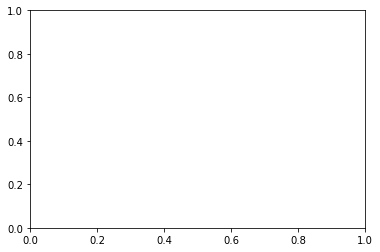

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# Create a summary of average number of parts by year: `parts_by_year`
partsByYear = sets.groupby('year').mean
# Plot trends in average number of parts by year
fig, ax = plt.subplots()
ax.plot(parts_by_year().index, parts_by_year().num_parts)

ax.set(xlabel='Years', ylabel='Number of Parts')
ax.grid()
plt.show()


OK, so we can see that on average the number of parts has been steadly increacing.
But what about sets by themes? What themes have the most parts?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

parts_by_year = sets.groupby('theme_id').mean

#ax = plt.subplots(1,1,figsize=(25, 8))
fig, ax = plt.subplots(1,1,figsize=(25, 8))
ax.plot(parts_by_year().index, parts_by_year().num_parts)

ax.set(xlabel='theme_id', ylabel='Number of Parts')
ax.grid()
plt.show()

What i would have liked to do here is create a new dataset with the parents of each theme. 
Each theme acutally has sub themes. So for instance, Technic theme actually has 5 themes, it has Techinc, Artic Technic, Competition, Expert Builder and Model. So what I'd have liked to do with more time, is create a super theme column, and if a theme has a parent theme, then use that as the super theme, if it doesn't have a parent theme, then just use the ID as the super theme Value. 
Then build a graph of of that. 

## Custom functions
We use custom functions to execute a piece of code that we'd like to reuse all the time. 
We could multiply part number values by any value you want. You just pass the value you want multiplied, and how much you want it multipied by.
    

In [ ]:
def multiplyby(numtobemultiplied = 0, multiplyBy = 0):
    total = numtobemultiplied * multiplyBy
    return total

result = multiplyby(2, 4)
print(result)

## Numpy
NumPy can be used to perform a wide variety of mathematical operations on arrays.
Here we'll create a numpy array using the sets data set. We'll convert it to a numpy array first. 
We'll concentrate on the num_parts field. Using numpy we'll easily be able to gather information on pieces per set. 

In [ ]:
numparts = sets["num_parts"]
print(numparts)
arrnumparts = numparts.to_numpy()
print(arrnumparts)

You can perform different tasks on Numpy arrays. For instance, you can multiply every value by 2... if you'd want to 

In [ ]:
print(arrnumparts * 2)

You can get median amount of pieces for every lego set ever. 

In [ ]:
print(np.median(arrnumparts))

You could print the standard deviation for number of parts.

In [ ]:
print(np.std(arrnumparts))

## Dictionaries
Dictionaries are useful for storing key value pairs. Here we'll convert a dataframe to a dictionary.
We'll create a new very large dataframe and use a lambda function to filter.

In [ ]:
# Form a separate variable with your selections:
verylarge = sets['num_parts'].apply(lambda x: x>3000)
print(sets.loc[verylarge, ['name','num_parts', 'year']])
# Select only the valules that are > 3000 and convert it to a dictionary using to_dict()
print("\nNow print the new dictionary \n")
vlrge = sets.loc[verylarge, ['name','num_parts']].to_dict()
print(vlrge)

This isn't quite what I wanted, to_dict() isn't doing what i expected. Looks like, i've only got 2 elements in my dictionary!

In [ ]:
print(vlrge.keys())

We can convert it another way.

In [ ]:
vlrgedf = sets.loc[verylarge, ['name','num_parts']]
vlrged = dict(zip(vlrgedf["name"], vlrgedf["num_parts"]))
print(vlrged.keys())

In [ ]:
That looks much better. We have the corret number of keys.

In [ ]:
print(vlrged)

In [ ]:
Now we have a dictionary. We can perform actions like select based on the key.
How many pieces does the "Death Star II" have?

In [ ]:
print(vlrged['Death Star II'])

We can also use a dictionary to test for values, is tower bridge in the very large category of having more than 

In [ ]:
"Tower Bridge" in vlrged

## Merging
We'll add Suffixes for good practice. it's only added when two columns are the same. There are a few different ways to merge, but i went with this option because it gave me more control over what i was doing and made it easier to see what was happening. There are 

In [ ]:
alldf = pd.merge(colors, inv_parts, left_on='id', right_on='color_id', validate='1:m', suffixes=('_colors','_inv_parts'))

In [ ]:
print(alldf.shape)

In [ ]:
#print(tabulate(sets, headers='firstrow', tablefmt='fancy_grid')) come back to this
print(alldf.head)


In [ ]:
alldf = pd.merge(alldf, parts, left_on='part_num', right_on='part_num', suffixes=('_all','_parts'))

In [ ]:
print(alldf.head)

In [ ]:
alldf = pd.merge(alldf, part_cats, left_on='part_cat_id', right_on='id', suffixes=('_all', '_part_cats'))

In [ ]:
alldf = pd.merge(alldf, inv, left_on = 'inventory_id', right_on='id', suffixes=('_all', '_inv'))

In [ ]:
alldf = pd.merge(alldf, sets, left_on = 'set_num', right_on='set_num', suffixes=('_all', '_set_num'))

In [ ]:
alldf = pd.merge(alldf, themes, left_on = 'theme_id', right_on='id', suffixes=('_all', '_themes'))


## Inventory_sets issue
I needed to merge on multiple keys here because Inventory Sets had two foreign keys and merging on just one created incorrect multiple joins. 
Having serious issues joining the inventory sets. I'm not sure what this table does. But we've got the link between sets and inventories anyway, so we may not need it. There seems to be a quantity figure. 
On Kaggle there was a discussion about Inventory_Sets and there seems to be a bit of confusion. From what i can see, i should be able to work around not being able to load it. 

In [ ]:
#Tried with multiple keys
#alldf = pd.merge(alldf, inv_sets, left_on = ['id_inv', 'set_num'], right_on=['inventory_id', 'set_num'], 
#                 suffixes=('_all', '_inv_sets'))
#Tried with single keys
#alldf = pd.merge(alldf, inv_sets, left_on = 'id_inv', right_on='inventory_id', 
#                 suffixes=('_all', '_inv_sets'))


I exported the data to have a look at it in one place and give it a visual once over. 

In [ ]:
alldf.to_csv('all.csv')

We can see here with the .head function that everything looks good also. It's a big dataset. 
So maybe we'll splice and group it later. 

In [ ]:
print(alldf.head)


In [ ]:
# Plot histogram grid of the numeric features, with figure size of 15 by 15, and the x-axis lables rotated 45 degrees clockwise.
alldf.hist(figsize=(15,15), xrot=-45)

# Clear the text "residue"
plt.show()

# 6 Insights
1. Lego sets are increasing in size over the years. They took a slight dip in 2015 and 2016 (we're ignoring 2017 as it may not be a full years data) 
2. If you look at historical data going back to 1950 it looks like the sets have been increasing at a rapid pace. However, if you zoom in on the data from the last 20 years the set numbers is actually quite stable. 
3. The super sized sets aka sets with over 3000 pieces are all from the past 20 years so this is a new sized product that Lego have created. You can see that from the dictionary section. 
4. There are peaks and throughs with the releses of sets. You can see every few years there's a peak and then it tapers off. This may relate to the production cycle or maybe the most popular sets are focused on after a large number of sets are released. 
5. The lego eco system is very complicated, you can see this with the sheer number of pieces, sets, themes and then linking them all together is the inventories. Another interesting fact is that these are all traceable back to 1960. So the same system has been unaltered since then. Which says alot about the quality of the system and it's ability to be modified and improved on rather than wholesale replacement. 

# 7. Machine Learning
Lego: Machine learning models can be employed to predict the popularity or demand of LEGO sets in the future. By analyzing historical sales data, customer reviews, set characteristics (such as theme, size, and price) these models can learn patterns and make predictions about the potential popularity of new LEGO sets. This information can assist LEGO in optimizing production. 

Traffic Flow Prediction: Machine learning and deep learning models can be used to predict traffic flow patterns in the future. By analyzing historical traffic data, including variables such as traffic volume, weather conditions, time of day, and day of the week, these models can learn patterns and make predictions about future traffic congestion or traffic flow in specific areas. 

In both cases, it's crucial to have high-quality and relevant data to ensure the accuracy and reliability of the predictions. 

I would use regression methods, they are commonly used when you want to predict a continuous or numerical value based on input features. Here are some scenarios where regression methods are typically applied:
1.	Predictive Modeling: Regression methods are often used in predictive modeling tasks where the goal is to estimate or forecast a numerical value. What we dealt with in this example is very numeric based. We've sets per year, we don't have sale prices or sales per year. But with that information you could build a prediction model based on historical data and market trends, or predicting the lifespan of a product based on how long it's been selling well.
2.	Trend Analysis: Regression analysis can be employed to analyze trends and relationships between variables. For example, you can use regression to determine the impact of advertising expenditure on sales revenue, obviously, in our example you'd need to include this data. Advertising revenue per theme maybe.


# Data cleaning
The data quality was excellent with I couldn't find any issues with the data. 
Orphan records, blank spaces, invalid values. The data was excellent. 
If you did have a case where you had to resolve issues with data. You have a few different options. 


## Replace Missing Values
The dataset that I had was complete, with no unfilled values. 
But, if i did have to replace missing values i would have used the dataframe.fillna method. 
We have some rgb values as 0 in the colours dataframe. If for example they were NaN instead.
We'd use this code to replace the data with 0s.



In [ ]:
#print(colors.fillna(0))

## Drop Dubpicates
I didn't have an opportunity to drop duplicates but if i did have a requirement.
If for instance, the color table had dupe RGB values in it and i wanted to drop the dupes, it might have looked like this. 


In [ ]:
#commented out to avoid running
#colors.drop_duplicates(subset=['rgb'])



# Unused code due to not needed

## Retreive data from MySQL
My data originated from CSV files. I may have created a SQL database and read from there into the dataframes.
That would have been slightly different loading the data. 
It may have looked like this: 

In [ ]:
#import mysql.connector

#mydb = mysql.connector.connect(
#  host="localhost",
#  user="yourusername",
#  password="yourpassword",
#  database="lego"
#)

#mycursor = mydb.cursor()

#mycursor.execute("SELECT id, name, rgb, is_trans FROM colors")

#myresult = mycursor.fetchall()

#for x in myresult:
#  print(x)